In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
def read_gt_params(cc_specs_path):
    """
    The order of gt: [p_start, p_end, c1, c2]
    """
    
    para_gt_np = np.load(cc_specs_path)
    matrix = np.squeeze(para_gt_np)
    c1 = matrix[2]
    c2 = matrix[3]
    p_start = matrix[0]
    p_end = matrix[1]
    p_mid = 3/4 * (c1 + p_end/3)
    p1 = 2*p_mid - 0.5*p_start - 0.5*p_end
    result_vector = np.concatenate((p1, p_end))
    return result_vector 

In [13]:
p_start = np.array([0.02, 0.002, 0.000001])


case_naming = 'E:/OneDrive - UC San Diego/UCSD/Lab/Catheter/diff_catheter/scripts/test_diff_render_catheter_v2/gt_dataset3/gt_6_0.0006_-0.0010_0.2_0.01'
img_save_path = case_naming + '.png'
cc_specs_path = case_naming + '.npy'
para_gt_np = read_gt_params(cc_specs_path)

control_points_gt = np.vstack([p_start, para_gt_np.reshape(2, 3)])
print(control_points_gt)
print(control_points_gt[0])
control_points_gt[1] = (control_points_gt[1] + control_points_gt[0]/2 + control_points_gt[2]/2)/2

[[ 2.00000000e-02  2.00000000e-03  1.00000000e-06]
 [ 2.15634587e-02 -6.05764476e-04  5.16317712e-01]
 [ 1.65068886e-01 -2.39781477e-01  9.49010349e-01]]
[2.e-02 2.e-03 1.e-06]


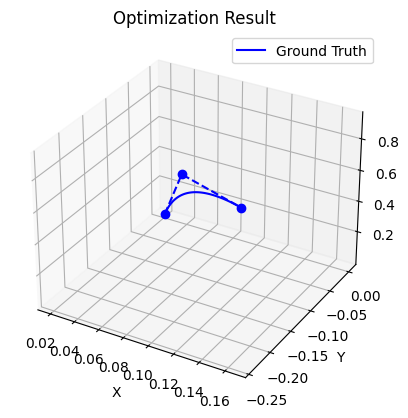

In [14]:
def bezier_curve_3d(control_points, num_points=100):
    t = np.linspace(0, 1, num_points)
    curve = np.zeros((num_points, 3))

    for i in range(num_points):
        curve[i] = (1 - t[i]) ** 2 * control_points[0] + \
                   2 * (1 - t[i]) * t[i] * control_points[1] + \
                   t[i] ** 2 * control_points[2]

    return curve

# Generate the Bezier curve
# curve = bezier_curve_3d(control_points)
curve_gt = bezier_curve_3d(control_points_gt)
# curve_init = bezier_curve_3d(control_points_init)

# Plotting the Bezier curve
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制第一条贝塞尔曲线及其控制点
# ax.plot(control_points[:, 0], control_points[:, 1], control_points[:, 2], 'ro--')
# ax.plot(curve[:, 0], curve[:, 1], curve[:, 2], 'r-', label='Optimized Result')

# 绘制第二条贝塞尔曲线及其控制点
ax.plot(control_points_gt[:, 0], control_points_gt[:, 1], control_points_gt[:, 2], 'bo--')
ax.plot(curve_gt[:, 0], curve_gt[:, 1], curve_gt[:, 2], 'b-', label='Ground Truth')

# ax.plot(control_points_init[:, 0], control_points_init[:, 1], control_points_init[:, 2], 'go--')
# ax.plot(curve_init[:, 0], curve_init[:, 1], curve_init[:, 2], 'g-', label='Initial Guess')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Optimization Result')
ax.legend()

# plt.savefig('Result.png')

plt.show()